## Libraries Imported 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Visualising the Dataset

In [3]:
data=pd.read_csv('dataset_assignment1.csv')
data.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [4]:
data.shape

(700, 10)

In [5]:
data.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'class'],
      dtype='object')

In [6]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,4.415714,3.131429,3.204286,2.804286,3.214286,3.557143,3.437143,2.864286,1.588571,0.344286
std,2.814236,3.050343,2.970958,2.854153,2.213193,3.613026,2.436676,3.052265,1.713995,0.475475
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [7]:
data.isnull().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
feature9    0
class       0
dtype: int64

In [8]:
data.isna().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
feature9    0
class       0
dtype: int64

In [9]:
data.nunique()

feature1    10
feature2    10
feature3    10
feature4    10
feature5    10
feature6    10
feature7    10
feature8    10
feature9     9
class        2
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


In [11]:
data['class'].value_counts()

0    459
1    241
Name: class, dtype: int64

## Samples of each class

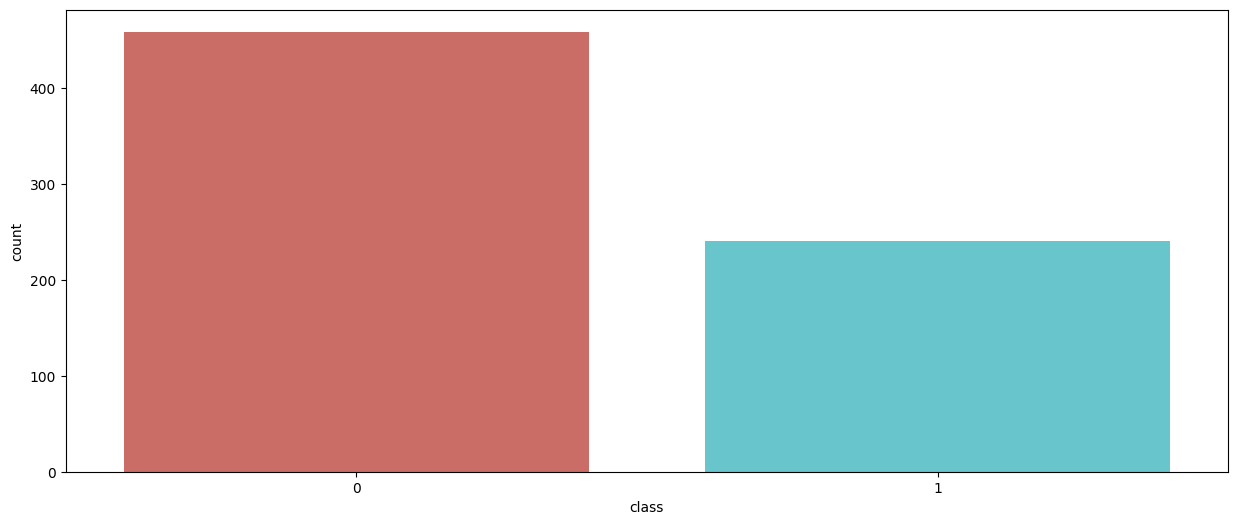

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(data,x=data['class'],
               palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

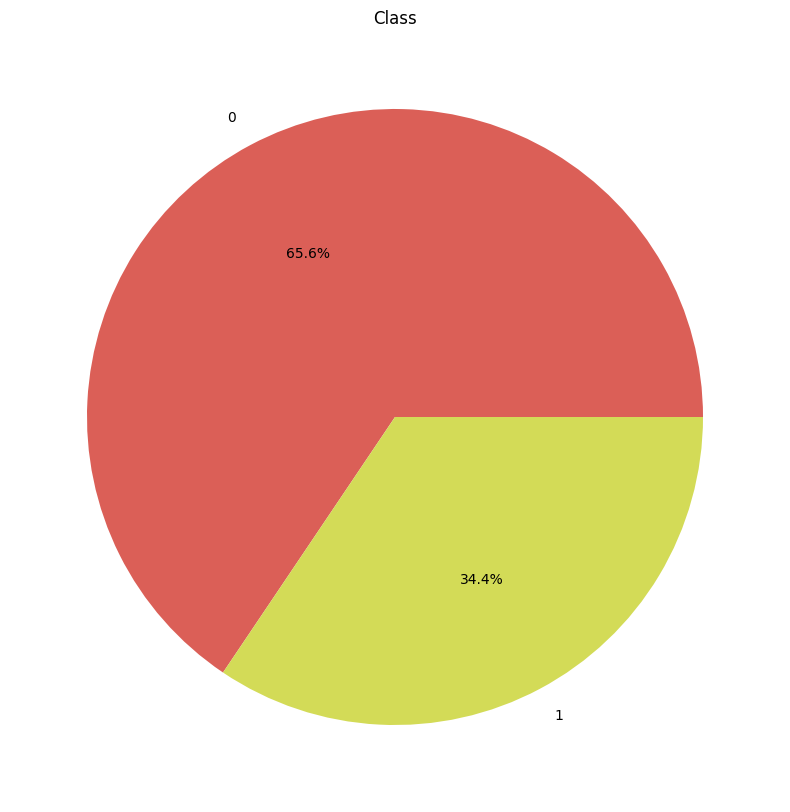

In [13]:
plt.figure(figsize=(10, 10))
counts = data['class'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Class')
plt.show()

#### We see that the dataset is imbalanced with 0 being the majority class and 1 being the minority class, so we need to make it balanced. For this we use the SMOTE technique.

## Distribution for each of the features

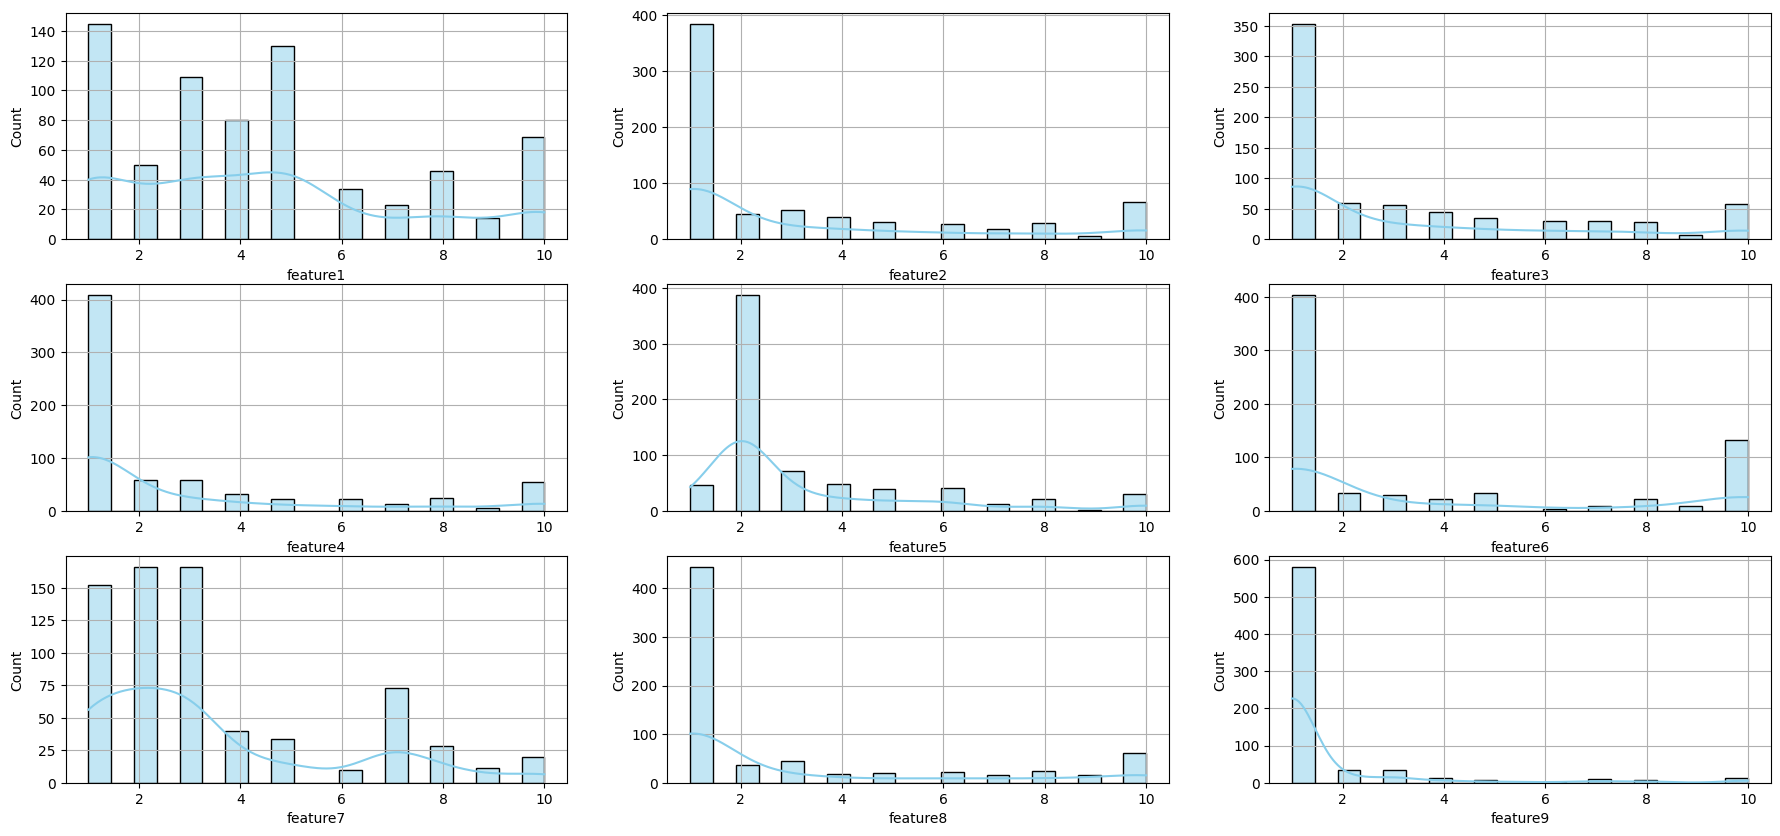

In [14]:
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
                 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9']
fig, axes = plt.subplots(3, 3, figsize=(22, 10))
axes = axes.flatten()
for i in range(len(feature_names)):
    axs = axes[i]
    sns.histplot(data.iloc[:, i],kde=True,ax=axs, bins=20, color='skyblue')
    axs.grid(True)
plt.show()

## Boxplots for each of the features

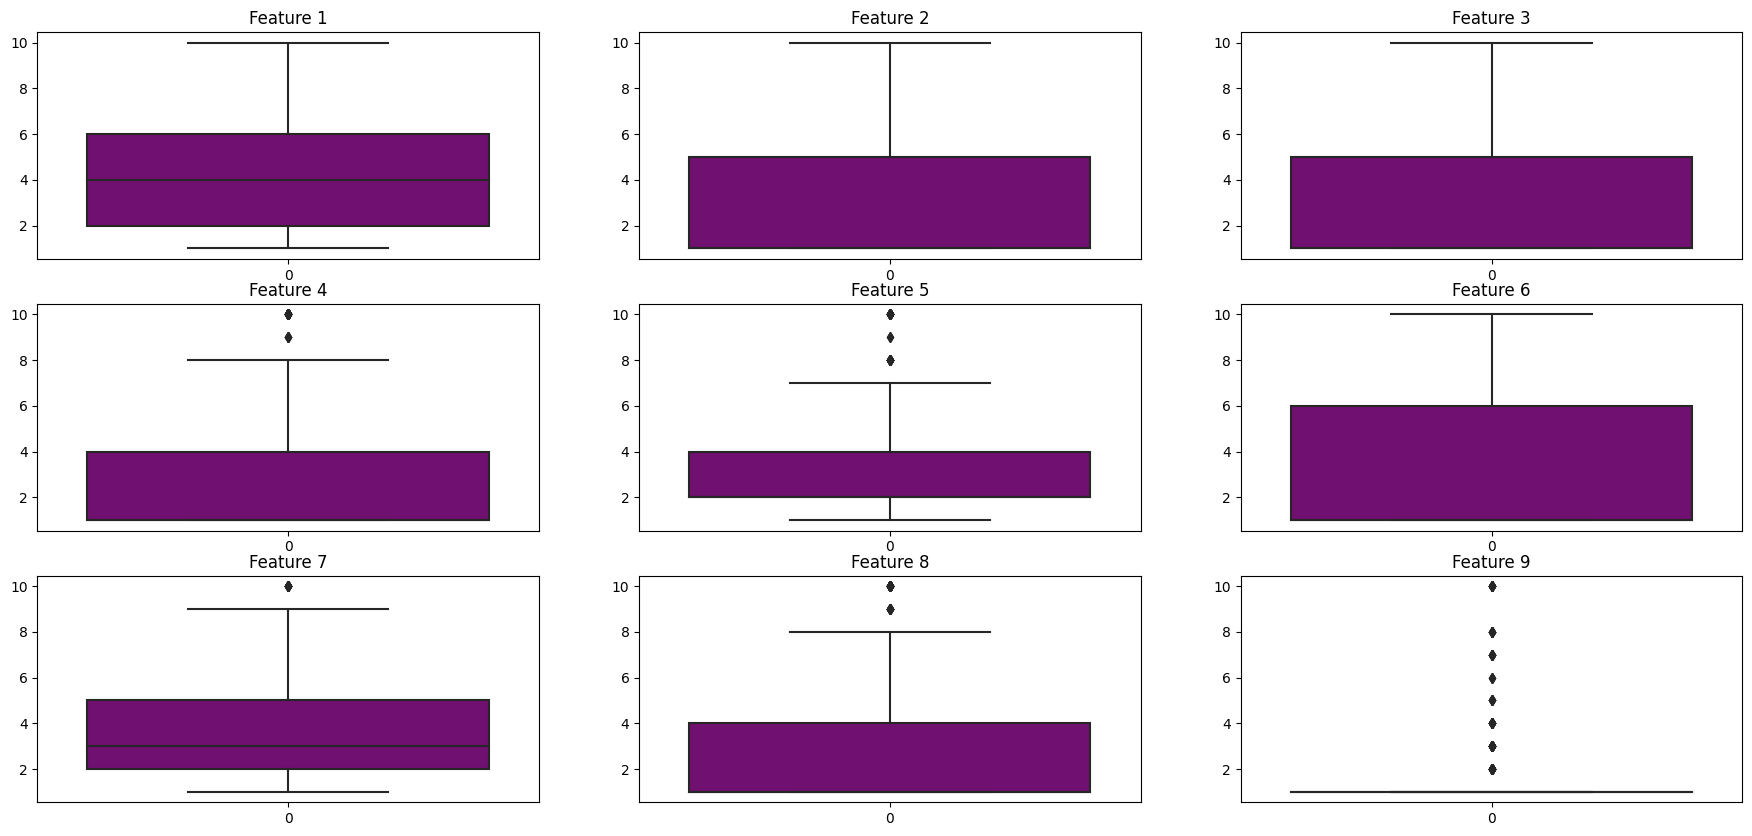

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(22, 10))
axes = axes.flatten()
for i in range(len(feature_names)):
    axs = axes[i]
    sns.boxplot(data.iloc[:, i],ax=axs,color='purple')
    axs.set_title(feature_names[i])
plt.show()


#### A box plot provides a concise visual representation of the distribution of data across various categories. Envision a box with a central line. The box signifies the interquartile range, encompassing the middle 50% of the data, while the line represents the median value. Whiskers extend from the box, indicating the range of the majority of data points. Any data points that lie significantly beyond this range are regarded as outliers and are usually depicted as individual dots.

### Separating into target and features

In [16]:
X = data.drop(['class'], axis=1)
y=data['class']

#### Splitting into training and testing sets

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#### SMOTE : One approach to addressing imbalanced datasets is to oversample the minority class. New examples of the minority class in this case 1 can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [18]:
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x_train, y_train)

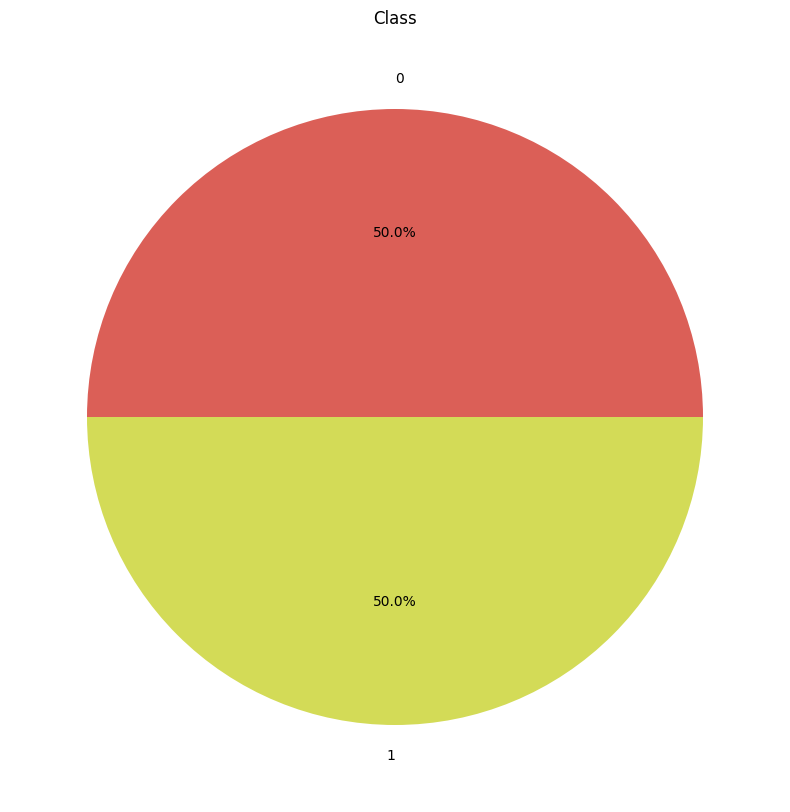

In [19]:
plt.figure(figsize=(10, 10))
counts = y_balanced.value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Class')
plt.show()

#### Now we see that the dataset is balanced. So now our models will be better trained for classification.

## Logistic Regression

### Parameters to consider for Logistic Regression model

In [20]:
parameters = {
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False],
    'random_state': [42]
}

In [21]:
logreg_classifier = LogisticRegression()
logreg_classifier.fit(x_balanced,y_balanced)

LogisticRegression()

## Randomized Search CV 
#### Randomized Search CV is a technique used for hyperparameter tuning in machine learning models. It aims to find a good set of hyperparameter values that optimize the model's performance.

In [22]:
randomized_search = RandomizedSearchCV(estimator=logreg_classifier, 
                                       param_distributions=parameters, 
                                       n_iter=100,
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1)


In [23]:
randomized_search.fit(x_balanced,y_balanced)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [42],
                                        'solver': ['liblinear', 'saga']},
                   verbose=2)

### Best parameters for the Logistic Regression model

In [24]:
randomized_search.best_params_

{'solver': 'liblinear',
 'random_state': 42,
 'penalty': 'l2',
 'max_iter': 100,
 'fit_intercept': True,
 'class_weight': None}

In [25]:
enhanced_logreg_classifier = LogisticRegression(solver='liblinear',
                                                 random_state=42,
                                                 penalty='l2',
                                                 max_iter=100,
                                                 fit_intercept=True,
                                                 class_weight=None)

In [26]:
enhanced_logreg_classifier.fit(x_balanced,y_balanced)

LogisticRegression(random_state=42, solver='liblinear')

In [27]:
y_pred_logreg = logreg_classifier.predict(x_test)
y_pred_enhanced_logreg=enhanced_logreg_classifier.predict(x_test)

In [28]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_enhanced_logreg = accuracy_score(y_test, y_pred_enhanced_logreg)
print("Logistic Regression Classifier - Accuracy:", accuracy_logreg)
print("Enhanced Logistic Regression Classifier - Accuracy:", accuracy_enhanced_logreg)

Logistic Regression Classifier - Accuracy: 0.9714285714285714
Enhanced Logistic Regression Classifier - Accuracy: 0.9714285714285714


In [29]:
print("\nLogistic Regression Classifier - Classification Report:")
report_logreg = pd.DataFrame(classification_report(y_test, y_pred_enhanced_logreg,output_dict=True))
changed_names = {'accuracy': 'Accuracy_logistic', 'macro avg': 'macro_avg_logistic', 'weighted avg': 'weighted_avg_logistic',
                '0' : '0_logistic', '1' : '1_logistic'}
report_logreg = report_logreg.rename(columns=changed_names)
report_logreg


Logistic Regression Classifier - Classification Report:


,0_logistic,1_logistic,Accuracy_logistic,macro_avg_logistic,weighted_avg_logistic
precision,0.968750,0.977273,0.971429,0.973011,0.971550
recall,0.989362,0.934783,0.971429,0.962072,0.971429
f1-score,0.978947,0.955556,0.971429,0.967251,0.971261
support,94.000000,46.000000,0.971429,140.000000,140.000000


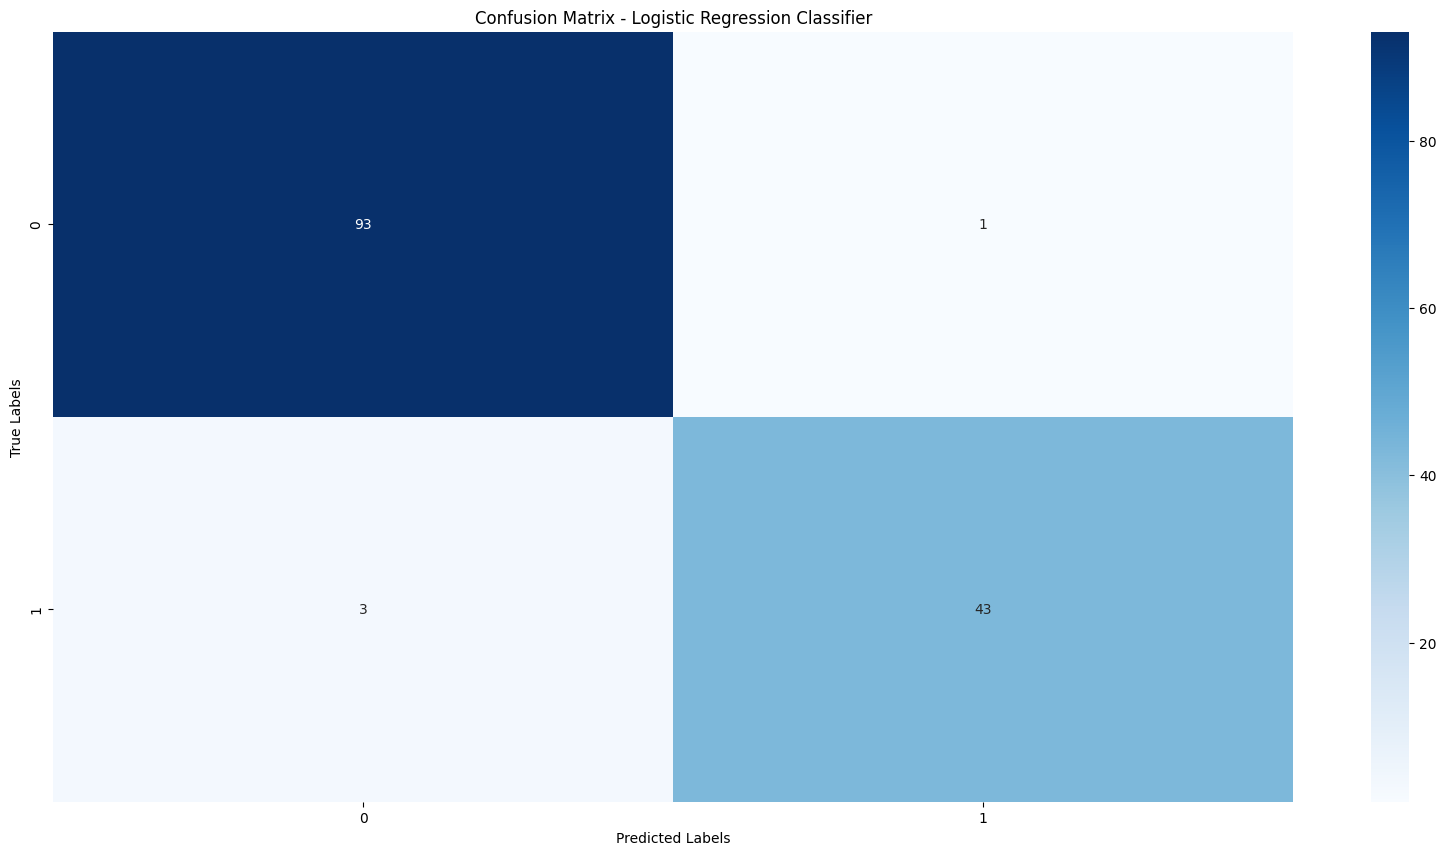

In [30]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(20, 10))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()

## Decision Tree Classifier

### Parameters to consider for Decision Tree model

In [31]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth': [5,6,8],
    'min_samples_split': [2,3,4]
}

In [32]:
dectree_classifier=DecisionTreeClassifier()
dectree_classifier.fit(x_balanced,y_balanced)

DecisionTreeClassifier()

In [33]:
randomized_search = RandomizedSearchCV(estimator=dectree_classifier, 
                                       param_distributions=parameters, 
                                       n_iter=100,
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1)


In [34]:
randomized_search.fit(x_balanced,y_balanced)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 6, 8],
                                        'min_samples_split': [2, 3, 4],
                                        'splitter': ['best', 'random']},
                   verbose=2)

### Best parameters for Decision Tree model

In [35]:
randomized_search.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'max_depth': 5,
 'criterion': 'entropy'}

In [36]:
enhanced_decision_trees = DecisionTreeClassifier(splitter = 'random',
 min_samples_split = 4,
 max_depth = 5,
 criterion = 'entropy',
 random_state= 42)
enhanced_decision_trees.fit(x_balanced,y_balanced)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4,
                       random_state=42, splitter='random')

In [37]:
y_pred_dectree=dectree_classifier.predict(x_test)
y_pred_enhanced_dectree=enhanced_decision_trees.predict(x_test)

In [38]:
accuracy_dectree = accuracy_score(y_test, y_pred_dectree)
accuracy_enhanced_dectree = accuracy_score(y_test, y_pred_enhanced_dectree)

print("Decision Tree Classifier - Accuracy:", accuracy_dectree)
print(" Enhanced Decision Tree Classifier - Accuracy:", accuracy_enhanced_dectree)

Decision Tree Classifier - Accuracy: 0.9214285714285714
 Enhanced Decision Tree Classifier - Accuracy: 0.9357142857142857


In [39]:
print("\nDecision Tree Classifier - Classification Report:")
report_dectree = pd.DataFrame(classification_report(y_test, y_pred_enhanced_dectree,output_dict=True))
changed_names = {'accuracy': 'Accuracy_decision', 'macro avg': 'macro_avg_decision', 'weighted avg': 'weighted_avg_decision',
                '0' : '0_decision', '1' : '1_decision'}
report_dectree = report_dectree.rename(columns=changed_names)
report_dectree


Decision Tree Classifier - Classification Report:


,0_decision,1_decision,Accuracy_decision,macro_avg_decision,weighted_avg_decision
precision,0.977528,0.862745,0.935714,0.920137,0.939814
recall,0.925532,0.956522,0.935714,0.941027,0.935714
f1-score,0.950820,0.907216,0.935714,0.929018,0.936493
support,94.000000,46.000000,0.935714,140.000000,140.000000


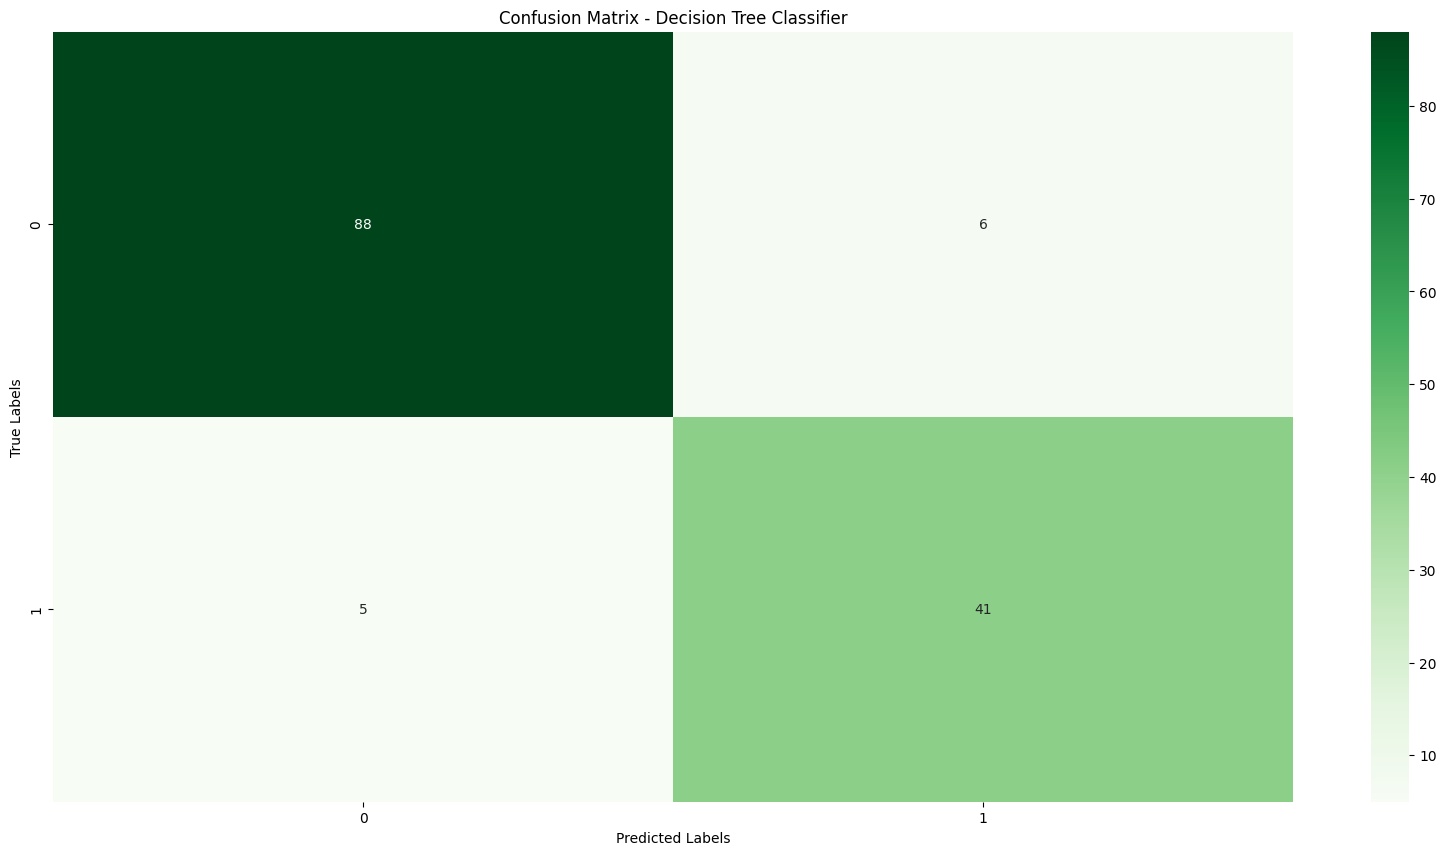

In [40]:
conf_matrix_dectree = confusion_matrix(y_test, y_pred_dectree)
plt.figure(figsize=(20,10))
sns.heatmap(conf_matrix_dectree, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

## Random Forest Classifier

In [41]:
rand_class=RandomForestClassifier()
rand_class.fit(x_balanced,y_balanced)

RandomForestClassifier()

### Parameters to consider for Random Forest model

In [42]:
parameters={'n_estimators': [100,150,200],
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'max_depth' : [5,6,8],
            'min_samples_split' : [2,3,4] }

In [43]:
randomized_search=RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                       param_distributions=parameters, 
                                       n_iter=100,
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1)

In [44]:
randomized_search.fit(x_balanced,y_balanced)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 6, 8],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 150, 200]},
                   verbose=2)

### Best parameters for the Random Forest Model

In [45]:
randomized_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 3,
 'max_depth': 6,
 'criterion': 'gini'}

In [46]:
enhanced_rand_class=RandomForestClassifier(n_estimators = 200,
 min_samples_split = 2,
 max_depth = 5,
 criterion = 'gini',
 random_state= 42)
enhanced_rand_class.fit(x_balanced,y_balanced)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [47]:
y_pred_rand=rand_class.predict(x_test)
y_enhanced_pred=enhanced_rand_class.predict(x_test)

In [48]:
accuracy_rand = accuracy_score(y_test, y_pred_rand)
accuracy_enhanced_rand = accuracy_score(y_test, y_enhanced_pred)
print("Accuracy:", accuracy_rand)
print("Enhanced Accuracy:", accuracy_enhanced_rand)

Accuracy: 0.9714285714285714
Enhanced Accuracy: 0.9857142857142858


In [49]:
print("\nRandom Forest Classifier - Classification Report:")
report_random = pd.DataFrame(classification_report(y_test, y_enhanced_pred,output_dict=True))
changed_names = {'accuracy': 'Accuracy_random', 'macro avg': 'macro_avg_random', 'weighted avg': 'weighted_avg_random',
                '0' : '0_random', '1' : '1_random'}
report_random = report_random.rename(columns=changed_names)
report_random


Random Forest Classifier - Classification Report:


,0_random,1_random,Accuracy_random,macro_avg_random,weighted_avg_random
precision,1.000000,0.958333,0.985714,0.979167,0.986310
recall,0.978723,1.000000,0.985714,0.989362,0.985714
f1-score,0.989247,0.978723,0.985714,0.983985,0.985789
support,94.000000,46.000000,0.985714,140.000000,140.000000


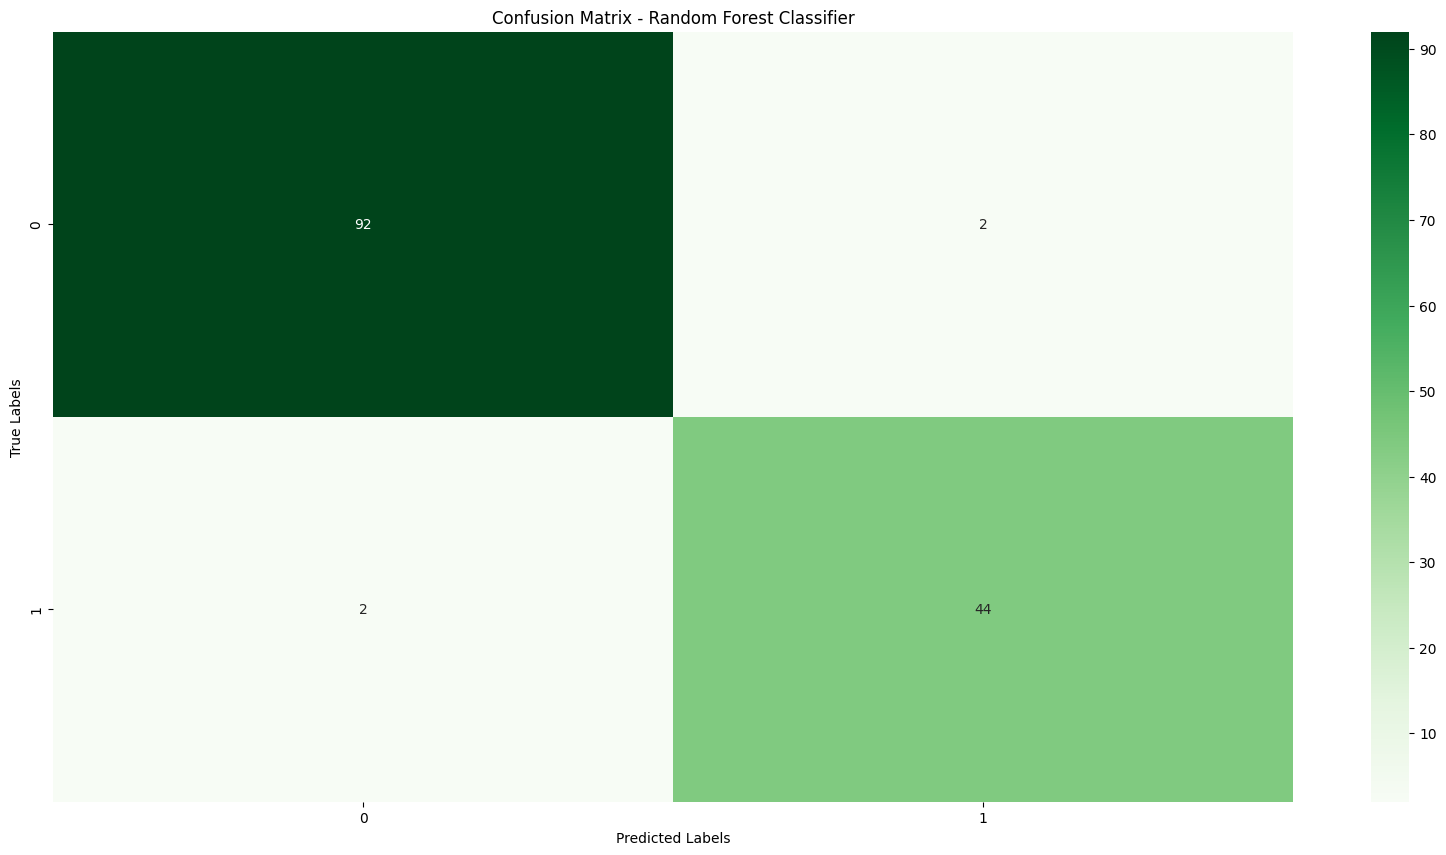

In [50]:
conf_matrix_rand = confusion_matrix(y_test, y_pred_rand)
plt.figure(figsize=(20,10))
sns.heatmap(conf_matrix_rand, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [51]:
combined_report = pd.concat([report_logreg,report_dectree,report_random],axis=1)
combined_report

,0_logistic,1_logistic,Accuracy_logistic,macro_avg_logistic,weighted_avg_logistic,0_decision,1_decision,Accuracy_decision,macro_avg_decision,weighted_avg_decision,0_random,1_random,Accuracy_random,macro_avg_random,weighted_avg_random
precision,0.968750,0.977273,0.971429,0.973011,0.971550,0.977528,0.862745,0.935714,0.920137,0.939814,1.000000,0.958333,0.985714,0.979167,0.986310
recall,0.989362,0.934783,0.971429,0.962072,0.971429,0.925532,0.956522,0.935714,0.941027,0.935714,0.978723,1.000000,0.985714,0.989362,0.985714
f1-score,0.978947,0.955556,0.971429,0.967251,0.971261,0.950820,0.907216,0.935714,0.929018,0.936493,0.989247,0.978723,0.985714,0.983985,0.985789
support,94.000000,46.000000,0.971429,140.000000,140.000000,94.000000,46.000000,0.935714,140.000000,140.000000,94.000000,46.000000,0.985714,140.000000,140.000000


#### THis combined report will give me the classification reports of all the classifiers together